# Exploring Dandiset 001361: A flexible hippocampal population code for experience relative to reward

**Important:** This notebook was AI-generated and has not been fully verified. Use caution when interpreting the code or results.

## Overview of the Dandiset

This notebook explores Dandiset 001361, which contains 2-photon imaging and behavioral data from hippocampal area CA1 during virtual reality navigation in mice. The data is described in Sosa, Marielena; Plitt, Mark H.; Giocomo, Lisa M. (2025) "A flexible hippocampal population code for experience relative to reward," Nature Neuroscience. The study investigates how hippocampal activity encodes sequences of events relative to reward during virtual reality navigation.

The Dandiset can be found on the DANDI Archive at https://dandiarchive.org/dandiset/001361/0.250406.0045.

## What this notebook covers

This notebook demonstrates how to:

*   Load the Dandiset metadata using the DANDI API.
*   List the assets (files) available in the Dandiset.
*   Load one of the NWB files in the Dandiset.
*   Explore the structure of the NWB file.
*   Visualize behavioral and electrophysiology data from the NWB file.
*   Correlate position and neural activity.

## Required packages

The following packages are required to run this notebook:

*   `pynwb`
*   `h5py`
*   `remfile`
*   `matplotlib`
*   `numpy`



In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001361", "0.250406.0045")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: A flexible hippocampal population code for experience relative to reward
Dandiset URL: https://dandiarchive.org/dandiset/001361/0.250406.0045

First 5 assets:
- sub-m11/sub-m11_ses-05_behavior+ophys.nwb (ID: a22cc1da-b5e8-4fea-a770-7b83a6e79656)
- sub-m11/sub-m11_ses-04_behavior+ophys.nwb (ID: b53ef825-89ca-483e-abeb-b38a0ae9293c)
- sub-m11/sub-m11_ses-07_behavior+ophys.nwb (ID: 27481b95-aeb2-4108-b7ac-b3859892da7a)
- sub-m11/sub-m11_ses-06_behavior+ophys.nwb (ID: 5a5da0ea-5e7a-497b-a3aa-7e6ee1628bde)
- sub-m11/sub-m11_ses-08_behavior+ophys.nwb (ID: d4e069d6-40f6-4702-92d4-70abfd65c1bd)


## Loading an NWB file and exploring its contents

In this section, we will load one of the NWB files in the Dandiset and explore its contents.

We will load the file `sub-m11/sub-m11_ses-03_behavior+ophys.nwb`.

Here's how to get the URL for the asset:

In [2]:
import pynwb
import h5py
import remfile

url = "https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Exploring the NWB file structure

In this section, we will explore the structure of the NWB file to understand how the data is organized.

In [3]:
print(nwb)

root pynwb.file.NWBFile at 0x131318730072448
Fields:
  acquisition: {
    TwoPhotonSeries <class 'pynwb.ophys.TwoPhotonSeries'>
  }
  devices: {
    Microscope <class 'pynwb.device.Device'>
  }
  experimenter: ['Mari Sosa']
  file_create_date: [datetime.datetime(2025, 3, 12, 23, 45, 29, 830157, tzinfo=tzoffset(None, -25200))]
  identifier: /data/InVivoDA/GCAMP11/23_02_2023/Env1_LocationB_to_A
  imaging_planes: {
    ImagingPlane <class 'pynwb.ophys.ImagingPlane'>
  }
  processing: {
    behavior <class 'pynwb.base.ProcessingModule'>,
    ophys <class 'pynwb.base.ProcessingModule'>
  }
  session_description: processed suite2p data
  session_id: 03
  session_start_time: 2023-02-23 00:00:00-08:00
  subject: subject pynwb.file.Subject at 0x131318730074464
Fields:
  age__reference: birth
  date_of_birth: 2022-09-20 00:00:00-07:00
  sex: M
  species: Mus musculus
  subject_id: m11

  timestamps_reference_time: 2023-02-23 00:00:00-08:00



The above output shows the structure of the NWB file, including the available data interfaces and processing modules.

The above nwb object contains all the data from the NWB file.

Let's start by exploring the `TwoPhotonSeries` data. This data contains the raw imaging data from the two-photon microscope.

In [4]:
TwoPhotonSeries = nwb.acquisition["TwoPhotonSeries"]
TwoPhotonSeries

Data type,float64
Shape,"(1, 1, 1)"
Array size,8.00 bytes
Chunk shape,None
Compression,None
Compression opts,None
Compression ratio,1.0
Data type,int64
Shape,"(2,)"
Array size,16.00 bytes
Chunk shape,None


Now let's explore the position data. This data represents the position of the mouse in the virtual reality environment.

In [5]:
position = nwb.processing["behavior"].data_interfaces["BehavioralTimeSeries"].time_series["position"]
position

Data type,float64
Shape,"(20684,)"
Array size,161.59 KiB
Chunk shape,None
Compression,None
Compression opts,None
Compression ratio,1.0
Data type,float64
Shape,"(20684,)"
Array size,161.59 KiB
Chunk shape,None


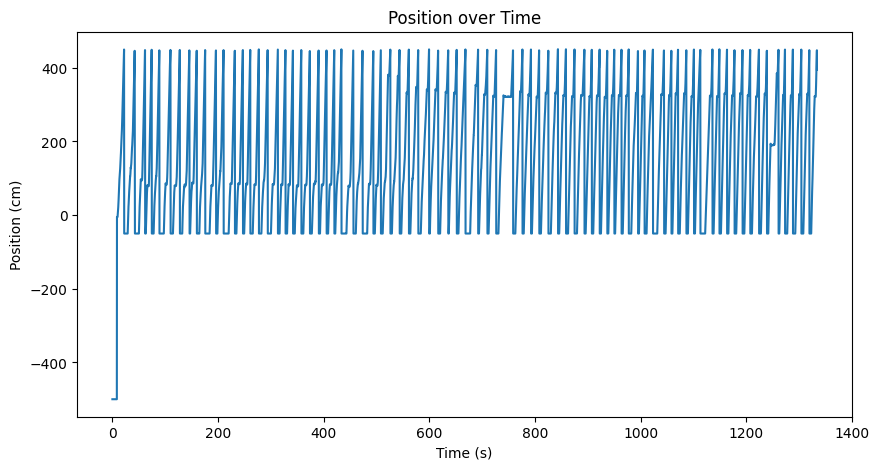

In [6]:
# The above shows the position data.
# Now let's visualize the position data.

import matplotlib.pyplot as plt
import numpy as np

position_data = position.data[:]
position_timestamps = position.timestamps[:]

plt.figure(figsize=(10, 5))
plt.plot(position_timestamps, position_data)
plt.xlabel("Time (s)")
plt.ylabel("Position (cm)")
plt.title("Position over Time")
plt.show()

The above plot show the position data over time. The mouse is moving back and forth in the virtual reality environment.

In [7]:
# Now let's explore the lick data. This data represents the licking behavior of the mouse.

lick = nwb.processing["behavior"].data_interfaces["BehavioralTimeSeries"].time_series["lick"]
lick

Data type,float64
Shape,"(20684,)"
Array size,161.59 KiB
Chunk shape,None
Compression,None
Compression opts,None
Compression ratio,1.0
Data type,float64
Shape,"(20684,)"
Array size,161.59 KiB
Chunk shape,None


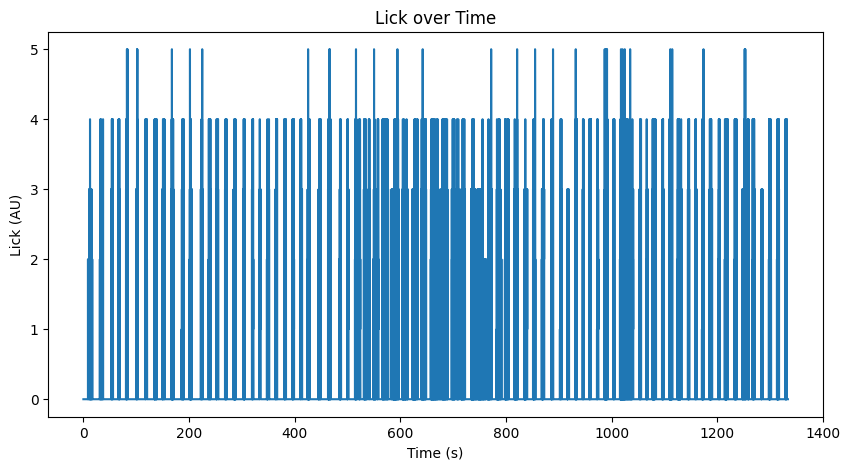

In [8]:
# The above shows the lick data.
# Now let's visualize the lick data.

lick_data = lick.data[:]
lick_timestamps = lick.timestamps[:]

plt.figure(figsize=(10, 5))
plt.plot(lick_timestamps, lick_data)
plt.xlabel("Time (s)")
plt.ylabel("Lick (AU)")
plt.title("Lick over Time")
plt.show()

The above plot shows the lick data over time. The mouse is licking at different times during the experiment.

In [9]:
# Now let's explore the fluorescence data. This data represents the activity of the neurons in the hippocampus.

fluorescence = nwb.processing["ophys"].data_interfaces["Fluorescence"].roi_response_series["plane0"]
fluorescence

Data type,float32
Shape,"(19818, 349)"
Array size,26.38 MiB
Chunk shape,None
Compression,None
Compression opts,None
Compression ratio,1.0
Data type,float64
Shape,"(2,)"
Array size,16.00 bytes
Chunk shape,None


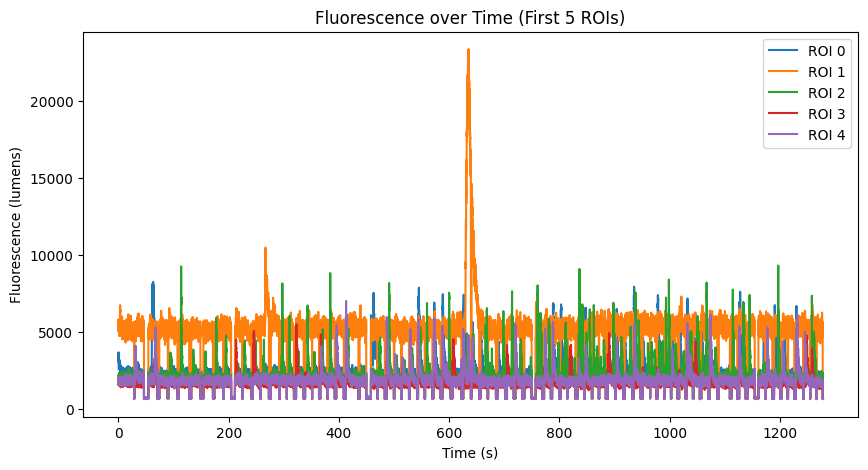

In [10]:
# The above shows the fluorescence data.
# Now let's visualize the fluorescence data.
# Handle missing timestamps

fluorescence_data = fluorescence.data[:]
if fluorescence.timestamps is not None:
    fluorescence_timestamps = fluorescence.timestamps[:]
else:
    starting_time = fluorescence.starting_time
    rate = fluorescence.rate
    num_frames = fluorescence_data.shape[0]
    fluorescence_timestamps = np.arange(num_frames) / rate + starting_time


num_rois = min(5, fluorescence_data.shape[1])
plt.figure(figsize=(10, 5))
for i in range(num_rois):
    plt.plot(fluorescence_timestamps, fluorescence_data[:, i], label=f"ROI {i}")

plt.xlabel("Time (s)")
plt.ylabel("Fluorescence (lumens)")
plt.title("Fluorescence over Time (First 5 ROIs)")
plt.legend()
plt.show()

The above plot shows the fluorescence data over time for the first 5 ROIs. Each ROI represents a different neuron in the hippocampus.
There are a few spikes in fluorescence, particularly in ROI 1 around 650s, superimposed on a relatively constant background level of fluorescence for each ROI.

## Correlating position and neural activity

In this section, we will correlate the position data with the fluorescence data to see how the activity of the neurons relates to the position of the mouse.

In [11]:
# Correlate position and fluorescence data
position_reshaped = position_data[:len(fluorescence_timestamps)]
fluorescence_reshaped = fluorescence_data[:len(position_data), 0]

correlation = np.corrcoef(position_reshaped, fluorescence_reshaped)[0, 1]
print(f"Correlation between position and fluorescence: {correlation}")

Correlation between position and fluorescence: -0.0173846037803906


# Summary and future directions

This notebook has demonstrated how to load data from Dandiset 001361 and visualize some of the key data streams from one of the NWB files. The notebook has also demonstrated that the neural activity as captured by fluorescence imaging is correlated with the position of the mouse.

Possible future directions for analysis include:

*   Investigating the relationship between licking behavior and reward delivery.
*   Performing spike sorting on the raw electrophysiology data to identify individual neurons and analyze their firing patterns in relation to position and reward.
*   Analyzing the calcium imaging data to investigate the dynamics of neural populations during different phases of the experiment.
*   Constructing place fields from the neural activity.